In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

In [17]:
TIC = 'TIC 55525572' # Check with different TIC Ids
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[1:4] # Search available data and select data from specific sectors for the TIC ID
lc_collection = available_data_select.download_all().stitch() # Download selected data and stitch each section together
lc_collection

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1437.9798742982116,———,———,8.5769291e-04,151577,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1437.9812631767525,———,———,8.5768313e-04,151578,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1437.9826520552933,———,———,8.5767335e-04,151579,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1437.9840409338342,———,———,8.5766357e-04,151580,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1437.9854298124333,———,———,8.5765385e-04,151581,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1437.9868186909741,———,———,8.5764407e-04,151582,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1437.9882075695732,———,———,8.5763435e-04,151583,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1437.9895964481134,———,———,8.5762457e-04,151584,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

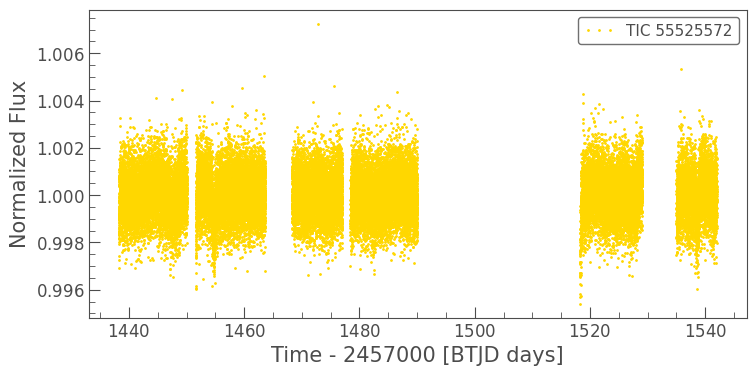

In [18]:
%matplotlib inline
lc_collection.plot(color = 'gold', lw = 0, marker = '.')

Binning -> take multiple data points and create one point based on the average. Helps the light curve become more apparent.

Take the data and split it into multiple bin-widths (typically 15 minutes). Take the average of all the points in this bin (this is likely why our binned data looked so convoluted on our original graphs, as we were using the default bin width on mega-stitched graphs).

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

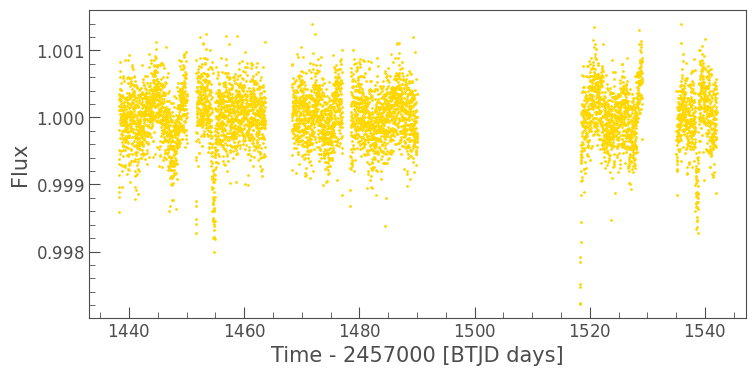

In [19]:
bin_time = 15/24/60 # Set the bin time in units of days
lc_collection_binned = lc_collection.bin(bin_time)
%matplotlib inline
lc_collection_binned.plot(color = 'gold', lw = 0, marker = '.')

Let's plot the binned & unbinned data together!

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

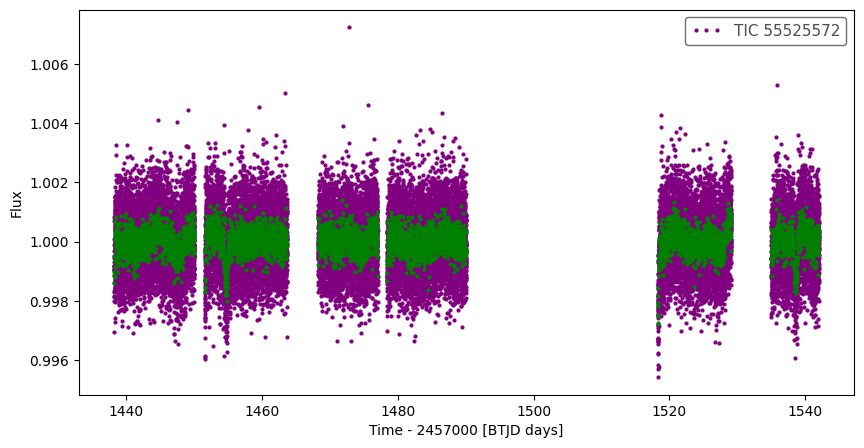

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))
lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple')#, markerSize = 1)
lc_collection_binned.plot(ax = ax, linewidth = 0, marker = 'o', color='green')#, markerSize = 1)